In [38]:
import gym
import numpy as np
import random 
from tqdm import tqdm 
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
env = gym.make('Taxi-v3',render_mode = 'ansi').env

In [40]:
print("Action Space {}".format(env.action_space))


Action Space Discrete(6)


In [41]:
print("State Space {}".format(env.observation_space))


State Space Discrete(500)


## Q Learning Taxi

In [42]:
class Agent:
    def __init__(self, env, alpha, gamma):
        self.env   = env 
        self.alpha = alpha
        self.gamma = gamma
        
        self.Q = np.zeros([env.observation_space.n, env.action_space.n])
        
    def action(self, state):
        return np.argmax(self.Q[state]) 
    
    def QUpdate(self, state, action, next_state, reward):
        
        # Q learning equation update
        self.Q[state, action] = self.Q[state, action] + \
                                self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state,action])
    
    def train(self, epoches = 10000, epsilon = 0.1):
        
        timesteps_per_episode = []
        penalties_per_episode = []
        
        for i in tqdm(range(epoches)):
            
            state = env.reset()[0]
            epochs, penalties, reward = 0, 0, 0
            done = False
            
            while not done: 
                if random.uniform(0,1) <= epsilon:
                    action = env.action_space.sample()
                else: 
                    action = self.action(state) 
                
                # print(env.step(action))
                next_state, reward, done, info, more_info = env.step(action)
                
                done = done or info 
                
                self.QUpdate(state, action, next_state, reward) 
                
                if reward == -10:
                    penalties += 1

                state = next_state
                epochs += 1
        
            timesteps_per_episode.append(epochs)
            penalties_per_episode.append(penalties)  
        
        

        fig, ax = plt.subplots(figsize = (12, 4))
        ax.set_title("Timesteps to complete ride")    
        pd.Series(timesteps_per_episode).plot(kind='line')
        plt.show()

        fig, ax = plt.subplots(figsize = (12, 4))
        ax.set_title("Penalties per ride")    
        pd.Series(penalties_per_episode).plot(kind='line')
        plt.show()
    
    def drive(self, start_state):
        
        env.reset()
        state = start_state 
        
        env.s = state
        done = False

        reward = 0
        penalties = 0 
        
        # store frames to latter plot them
        frames = []
        steps = 0
        
        while not done:
            action = self.action(state)
    
            next_state, reward, done, info , more_info = env.step(action)
            
            done = done or info 
            
            if reward == -10:
                penalties += 1
            
            frames.append(env.render())
            state = next_state 
            steps += 1
            
        
        print("Finished driving")
        print("Time taken: ",steps)
        print("Penalties incurred: ", penalties) 
        
        return frames 
            
        

In [43]:
alpha = 0.1
gamma = 0.6

agent = Agent(gamma = gamma, alpha = alpha, env = env)

  0%|          | 0/10000 [00:00<?, ?it/s]/home/aman/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
  0%|          | 5/10000 [00:00<03:49, 43.64it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1525.04it/s]


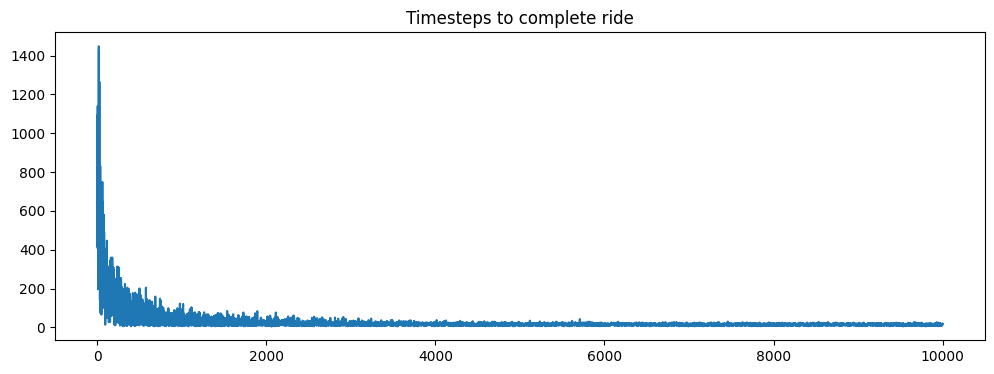

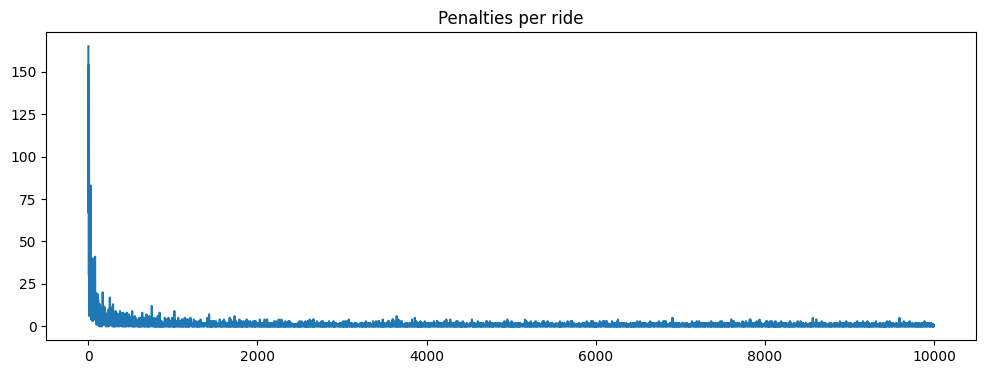

In [44]:
agent.train()

In [45]:
frames = agent.drive(start_state = 123)

Finished driving
Time taken:  19
Penalties incurred:  0


In [46]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame)
        sleep(1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

